In [1]:
import torch
import torchvision
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F

In [2]:
%%time
x = torch.Tensor([5,3]) #a tensor is a multidimensional array
y = torch.Tensor([2,1])
print(x*y)

tensor([10.,  3.])
Wall time: 53.2 ms


In [ ]:
x = torch.zeros([2,5])
print(x)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


In [ ]:
x.shape

torch.Size([2, 5])

In [ ]:
y = torch.rand([2,5]) #an array of random values btw 0 and 1 with 2 rows 5 cols
y

tensor([[0.2658, 0.9630, 0.2523, 0.2924, 0.5127],
        [0.4900, 0.7715, 0.3365, 0.0636, 0.6509]])

In [ ]:
y.view([1,10]) #this reshapes the array

tensor([[0.2658, 0.9630, 0.2523, 0.2924, 0.5127, 0.4900, 0.7715, 0.3365, 0.0636,
         0.6509]])

In [ ]:
y = y.view([1,10])

In [ ]:
y

tensor([[0.2658, 0.9630, 0.2523, 0.2924, 0.5127, 0.4900, 0.7715, 0.3365, 0.0636,
         0.6509]])

In [ ]:
train = datasets.MNIST('',train=True,download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST('',train=False,download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))

In [ ]:
trainset = torch.utils.data.DataLoader(train, batch_size = 10, shuffle = True)
testset = torch.utils.data.DataLoader(test, batch_size = 10, shuffle = True)

In [ ]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [ ]:
x,y = data[0][0], data[1][0]#x is the input data (the thing we want to predict) y is the label, the classification.
print(y)

tensor(5)


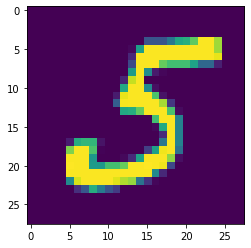

In [ ]:
plt.imshow(x.view([28,28]))
plt.show()

In [ ]:
%%time
total = 0
counter_dict = {x:0 for x in range(10)}

for data in trainset:
    xs, ys = data
    for y in ys:
        counter_dict[int(y)] +=1
        total+=1
        
print(counter_dict,total)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949} 60000
Wall time: 4.06 s


In [ ]:
for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


In [ ]:
class Net(nn.Module):
    
    def __init__(self):
        super().__init__() #super() ensures that the init fn in parent class is run
        self.fc1 = nn.Linear(28*28,64) #fc1 is first connection 1. 28*28 is the flattened image size. Linear because linear nn
        self.fc2 = nn.Linear(64,64) #input of fc2 is output of fc1, i.e. 64
        self.fc3 = nn.Linear(64,64)
        self.fc4 = nn.Linear(64,10) #output 10 because we have 10 classes in our dict
    
    def forward(self,x):
        x = F.relu(self.fc1(x)) #relu is the rectified linear. it is an activation function that ensures the neuron is 'firing'
        x = F.relu(self.fc2(x))      
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        return F.log_softmax(x,dim=1) #dim 1 means we are distributing across the output layer tensors
        
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [ ]:
X = torch.rand(28,28)
X = X.view(-1,28*28)

In [ ]:
output = net(X)
output

tensor([[-2.3481, -2.3249, -2.2461, -2.2606, -2.2303, -2.4164, -2.2056, -2.2672,
         -2.4077, -2.3434]], grad_fn=<LogSoftmaxBackward>)